In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense,  Dropout , LSTM
from keras.models import Sequential


In [2]:
start = '2010-01-01'
end = '2024-10-01'

stock = 'GOOG'

data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2010-01-04 00:00:00+00:00,15.571998,15.610239,15.678981,15.547723,15.615220,78541293
2010-01-05 00:00:00+00:00,15.503423,15.541497,15.637387,15.480475,15.620949,120638494
2010-01-06 00:00:00+00:00,15.112601,15.149715,15.588072,15.102393,15.588072,159744526
2010-01-07 00:00:00+00:00,14.760787,14.797037,15.193053,14.760922,15.178109,257533695
2010-01-08 00:00:00+00:00,14.957565,14.994298,15.024933,14.672753,14.744733,189680313
...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,163.639999,163.639999,164.550003,162.029999,164.250000,18774100
2024-09-25 00:00:00+00:00,162.990005,162.990005,164.216995,162.774994,162.970001,13607900


In [4]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04 00:00:00+00:00,15.571998,15.610239,15.678981,15.547723,15.615220,78541293
1,2010-01-05 00:00:00+00:00,15.503423,15.541497,15.637387,15.480475,15.620949,120638494
2,2010-01-06 00:00:00+00:00,15.112601,15.149715,15.588072,15.102393,15.588072,159744526
3,2010-01-07 00:00:00+00:00,14.760787,14.797037,15.193053,14.760922,15.178109,257533695
4,2010-01-08 00:00:00+00:00,14.957565,14.994298,15.024933,14.672753,14.744733,189680313
...,...,...,...,...,...,...,...
3705,2024-09-24 00:00:00+00:00,163.639999,163.639999,164.550003,162.029999,164.250000,18774100
3706,2024-09-25 00:00:00+00:00,162.990005,162.990005,164.216995,162.774994,162.970001,13607900
3707,2024-09-26 00:00:00+00:00,163.830002,163.830002,165.500000,163.500000,165.029999,18234500


In [5]:
ma_100_days = data.Close.rolling(window=100).mean()

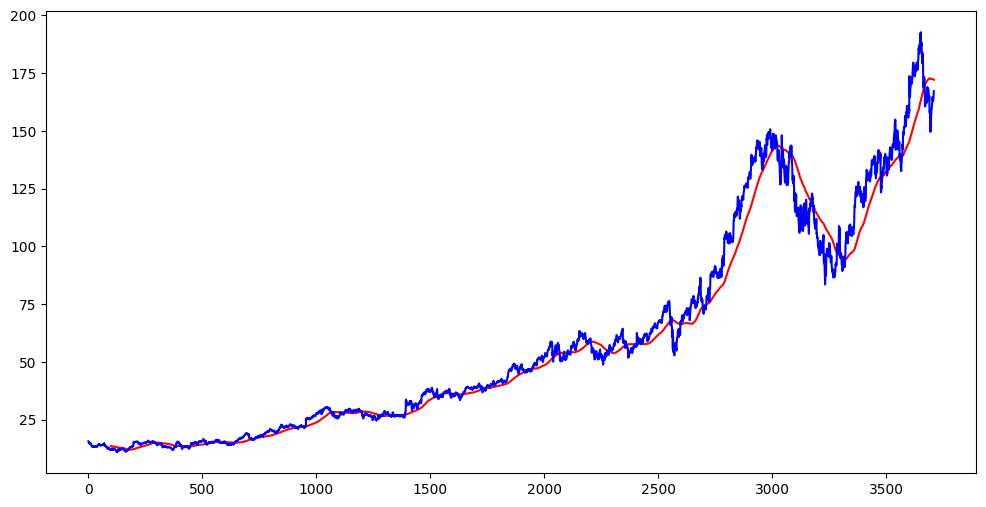

In [6]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(data['Close'], 'b')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(window=200).mean()

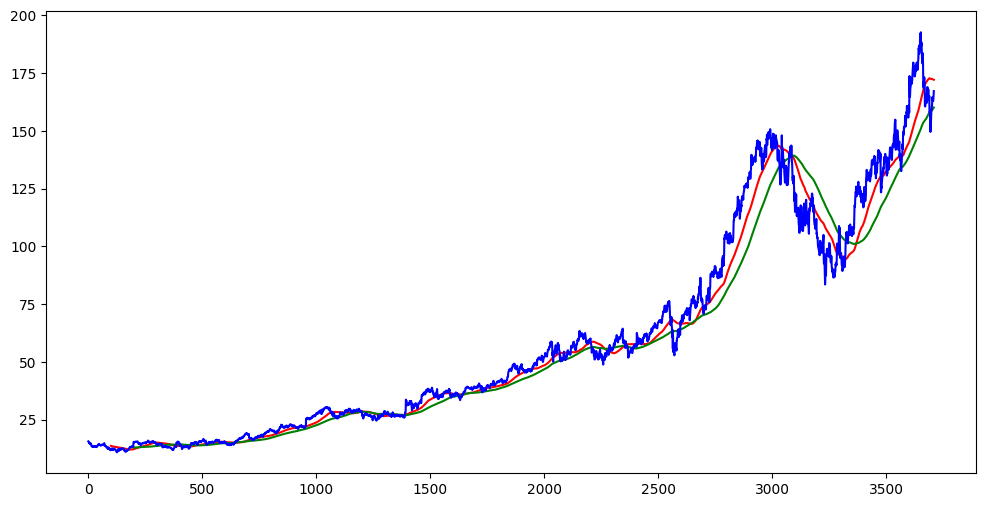

In [8]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'g')
plt.plot(data['Close'], 'b')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8):int(len(data))])

In [11]:
print(data_train.shape[0],"\n", data_test.shape[0])

2968 
 742


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scaled = scaler.fit_transform(data_train)

In [14]:
X=[]
y=[]
for i in range(100,data_train_scaled.shape[0]):
    X.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [15]:
X,y = np.array(X), np.array(y)

In [16]:
# model = Sequential()

# model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=60, activation='relu', return_sequences=True))
# model.add(Dropout(0.3))

# model.add(LSTM(units=80, activation='relu', return_sequences=True))
# model.add(Dropout(0.4))

# model.add(LSTM(units=120, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=1))

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [17]:
#early stopping to prevent overfitting
#tuning the hyperparameters
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model.fit(X, y, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
81/81 [==============================] - 28s 154ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 2/100
81/81 [==============================] - 11s 130ms/step - loss: 1.8320e-04 - val_loss: 0.0034
Epoch 3/100
81/81 [==============================] - 10s 123ms/step - loss: 1.7303e-04 - val_loss: 0.0034
Epoch 4/100
81/81 [==============================] - 11s 139ms/step - loss: 1.8970e-04 - val_loss: 0.0097
Epoch 5/100
81/81 [==============================] - 9s 112ms/step - loss: 1.7404e-04 - val_loss: 0.0027
Epoch 6/100
81/81 [==============================] - 9s 113ms/step - loss: 1.5959e-04 - val_loss: 0.0022
Epoch 7/100
81/81 [==============================] - 9s 114ms/step - loss: 1.4812e-04 - val_loss: 0.0019
Epoch 8/100
81/81 [==============================] - 9s 113ms/step - loss: 1.4291e-04 - val_loss: 0.0021
Epoch 9/100
81/81 [==============================] - 9s 113ms/step - loss: 1.3720e-04 - val_loss: 0.0016
Epoch 10/100
81/81 [==============================] - 9

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
past_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat((past_100_days, data_test), ignore_index=True)

In [22]:
data_test_scaled = scaler.transform(data_test)

In [23]:
X=[]
y=[]
for i in range(100,data_test_scaled.shape[0]):
    X.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])

x,y = np.array(X), np.array(y)

In [24]:
y_pred = model.predict(np.array(X))

24/24 [==============================] - 2s 29ms/step


In [25]:
scale = 1/scaler.scale_
scale

array([134.98095512])

In [26]:
y_pred = y_pred*1/scale

In [27]:
y = y*1/scale

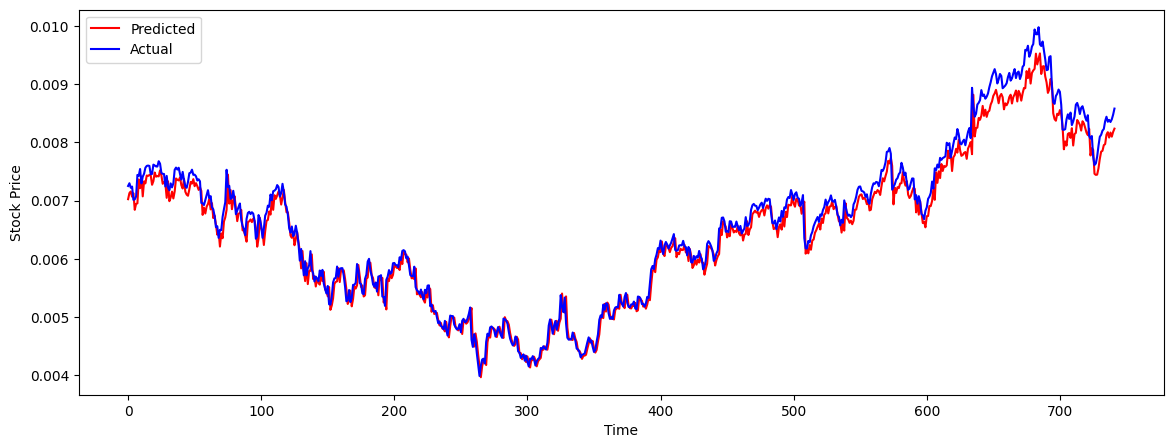

In [28]:
plt.figure(figsize=(14,5))
plt.plot(y_pred,'r',label='Predicted')
plt.plot(y,'b',label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
model.save('stock_prediction.h5')

d:\goku\passion\stocks\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
